<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>

## Week 2 | Lab : EDA and Visualization

**Clemson University** **Instructor(s):** Tim Ransom

----------------------
## Learning goals

- Identify trends and patterns in data using visualization techniques.
- Interpret descriptive statistics for a dataset.
- Create effective data visualizations using matplotlib.
- Evaluate the effectiveness of different visualization methods.
- Clean and prepare data for analysis.

In [1]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

In [2]:
# import the necessary libraries

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format ='retina'

import matplotcheck as mpc
from matplotcheck.base import PlotTester
import matplotcheck.notebook as nb
%matplotlib inline

<a class="anchor" id="seaborn"></a>
# 1 - Implementing Various Types of Plots using `matplotlib`  and `seaborn`.

Before you start coding your visualization, you need to decide what **type** of vizualization to use. A box plot, a histogram, a scatter plot, or something else? That will depend on the purpose of the plot (is it for performing an inspection on your data (EDA, or for showing your results/conclusions to people) and the number variables that you want to plot.

You have a lot of tools for plotting in Python. The basic one, of course, is `matplotlib` and there are other libraries that are built on top of it, such as `seaborn`, `bokeh`, or `altair`. 

In this class we will continue using `matplotlib` and also look into [`seaborn`](https://seaborn.pydata.org). Those two libraries are the ones you should be using for homework.

## 1.1 Introduction to `seaborn`

`Seaborn` is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. The library provides a database of useful datasets for educational purposes that can be loaded by typing:

```python
seaborn.load_dataset(name, cache=True, data_home=None, **kws)
```

For information on what these datasets are : https://github.com/mwaskom/seaborn-data

### The plotting functions in `seaborn` can be decided in two categories

- **'axes-level'** functions, such as `regplot`, `boxplot`, `kdeplot`, `scatterplot`, `distplot` which can connect with the `matplotlib` Axes object and its parameters. You can use that object as you would in `matplotlib`:
```python
f, (ax1, ax2) = plt.subplots(2)
sns.regplot(x, y, ax=ax1)
sns.kdeplot(x, ax=ax2)
ax1 = sns.distplot(x, kde=False, bins=20)
```

- **'figure-level'** functions, such as `lmplot`, `factorplot`, `jointplot`, `relplot`, `pairplot`. In this case, `seaborn` organizes the resulting plot which may include several Axes in a meaningful way. That means that the functions need to have total control over the figure, so it isn't possible to plot, say, an `lmplot` onto one that already exists. Calling the function always initializes a figure and sets it up for the specific plot it's drawing. These functions return an object of the type `FacetGrid` with its own methods for operating on the resulting plot.

To set the parameters for figure-level functions:

```python
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
```

## 1.2 The Titanic dataset

The `titanic.csv` file contains data for 887 passengers on the Titanic. Each row represents one person. The columns describe different attributes about the person including whether they survived, their age, their on-board class, their sex, and the fare they paid. Rows are often called observations, and columns are often called features or characteristics (of the data).

In [3]:
# remember that sns is the alias we gave seaborn when we imported it
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], dtype='object')

<div class='exercise'> <b> Exercise 1: </div>
    
-  Drop the following features from `titanic` dataFrame:
- `embarked`, `who`, `adult_male`, `embark_town`, `alive`, `alone` 

In [ ]:
"""Your code for exercise 1 here:"""
titanic = titanic.drop(['embarked', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], axis=1)

In [6]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'deck'], dtype='object')

<div class='exercise'> <b> Exercise 2:</div>
    
- Find for how many passengeres we do not have their deck information. 
- Use a pandas function to filter to rows that 'deck' in not `na`.
- Refer to this [document](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) for more information.
- store the answer in a variable called `missing_decks`

In [15]:
"""Your code for exercise 2 here:"""
# print(len(titanic['deck']))
# print(titanic['deck'].notna().sum())
# print(titanic['deck'])
# print(titanic['deck'].isna())
missing_decks = titanic['deck'].isna().sum()
# print(missing_decks)

688


## 1.3 Histograms

#### Plotting one variable's distribution (categorical and continous)
The most convenient way to take a quick look at a univariate distribution in `seaborn` is the `distplot()` function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

A histogram displays a quantitative (numerical) distribution by showing the number (or percentage) of the data values that fall in specified intervals. The intervals are on the x-axis and the number of values falling in each interval, shown as either a number or percentage, are represented by bars drawn above the corresponding intervals.

In [16]:
# What was the age distribution among passengers in the Titanic?
import seaborn as sns
sns.set(color_codes=True)

f, ax = plt.subplots(1,1, figsize=(8, 3))
ax = sns.distplot(titanic.age, kde=False, bins=20)

ax.set(xlim=(0, 90))
ax.set_ylabel('counts')

Text(0, 0.5, 'counts')

In [17]:
f, ax = plt.subplots(1,1, figsize=(8, 3))
ax.hist(titanic.age, bins=20)
ax.set_xlim(0,90)

(0.0, 90.0)

<div class='exercise'> <b> Exercise 3 : (pandas trick)</div>
    
- Count all the infants on board (age less than 3) and all the children ages 3-10.
- Store there values to `infants` and `children` respectively.
- Note that the number of infants or children are single numbers, not tuples
    
**Hint:** Use [len()](https://docs.python.org/3/library/functions.html) to count the required number.

In [ ]:
"""Your code for exercise 3 here:"""
infants = len(titanic[titanic['age'] < 3])
children = len(titanic[(titanic['age'] >= 3) & (titanic['age'] <= 10)])
#print(f'There were {infants} infants and {children} children on board the Titanic')


There were 24 infants and 40 children on board the Titanic


**Pandas trick:** We want to creat virtual "bins" for readability and replace ranges of values with categories. 

We will do this in an ad hoc way, **it can be done better**. For example in the previous plot we could set:
    
- `(age<3) = 'infants'`, 
- `(3<age<18)='children'`, 
- `(18<values<90)='adults'` <BR>

See matplotlib [colors](https://matplotlib.org/stable/users/explain/colors/colormaps.html) here.

In [26]:
# set the colors
cmap = plt.get_cmap('Pastel1')
young = cmap(0.5)
middle = cmap(0.2)
older = cmap(0.8)

# get the object we will change - patches is an array with len: num of bins
fig, ax = plt.subplots()
y_values, bins, patches = ax.hist(titanic.age, 10)

[patches[i].set_facecolor(young) for i in range(0,1)] # bin 0
[patches[i].set_facecolor(middle) for i in range(1,3)] # bins 1 and 2
[patches[i].set_facecolor(older) for i in range(3,10)] # 7 remaining bins 

ax.grid(True)
fig.show()

## 1.4 Kernel Density Estimation
The kernel density estimate can be a useful tool for plotting the shape of a distribution. The **bandwidth (bw)** parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values.

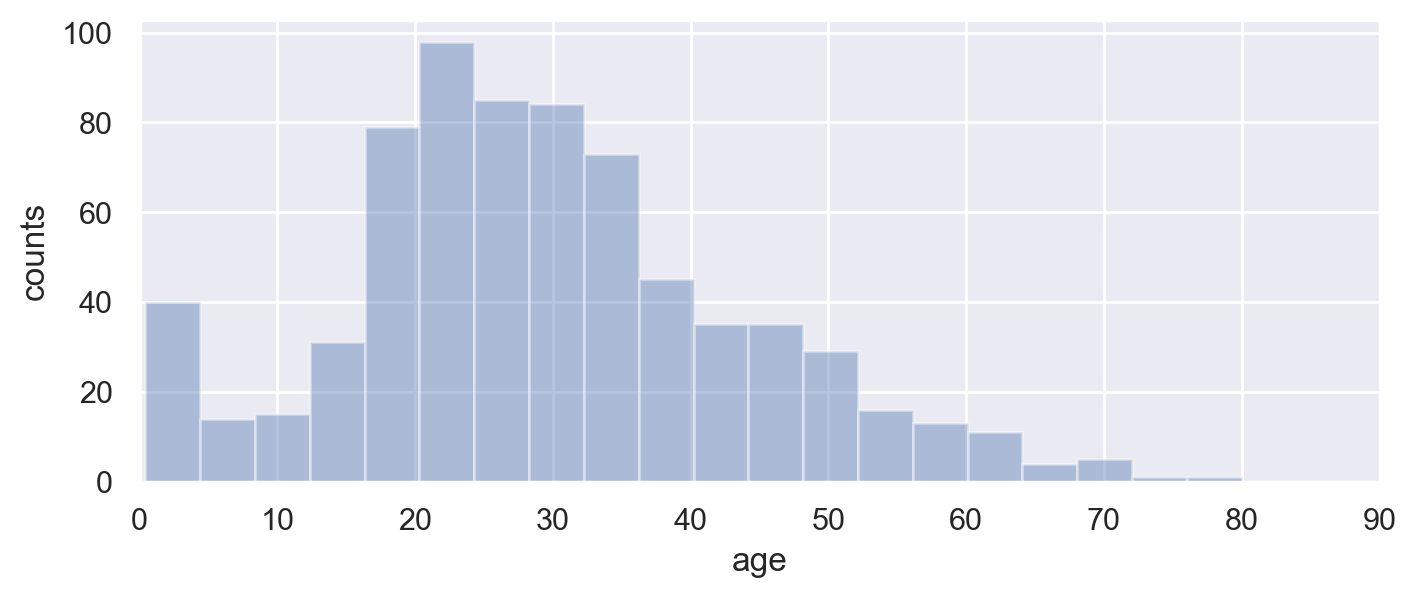

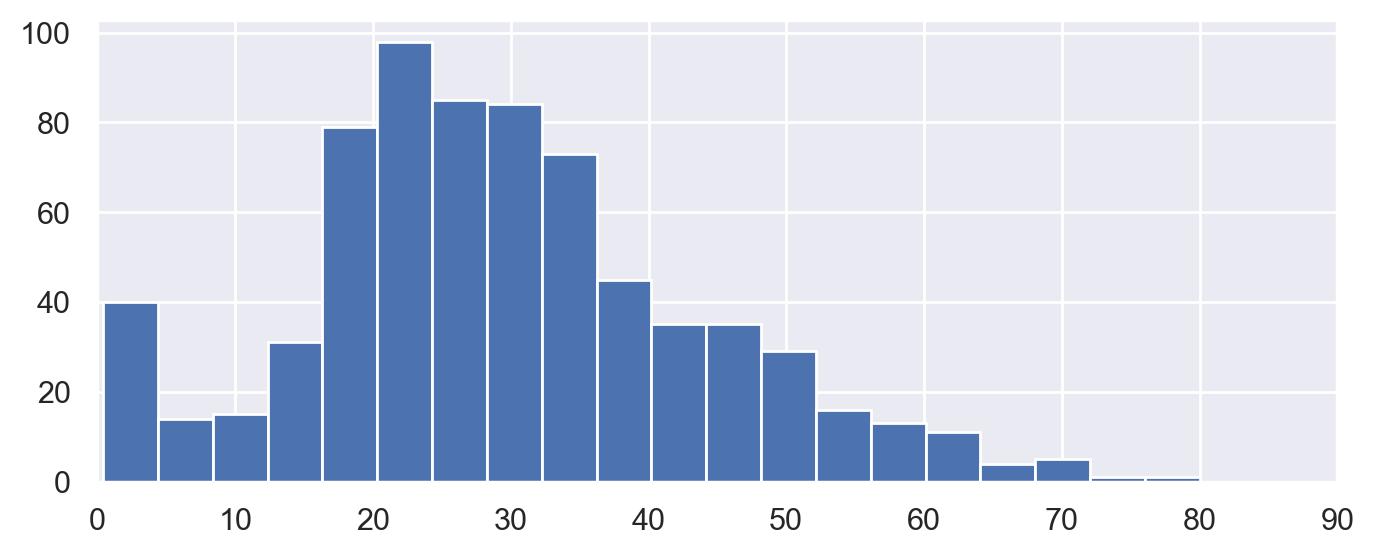

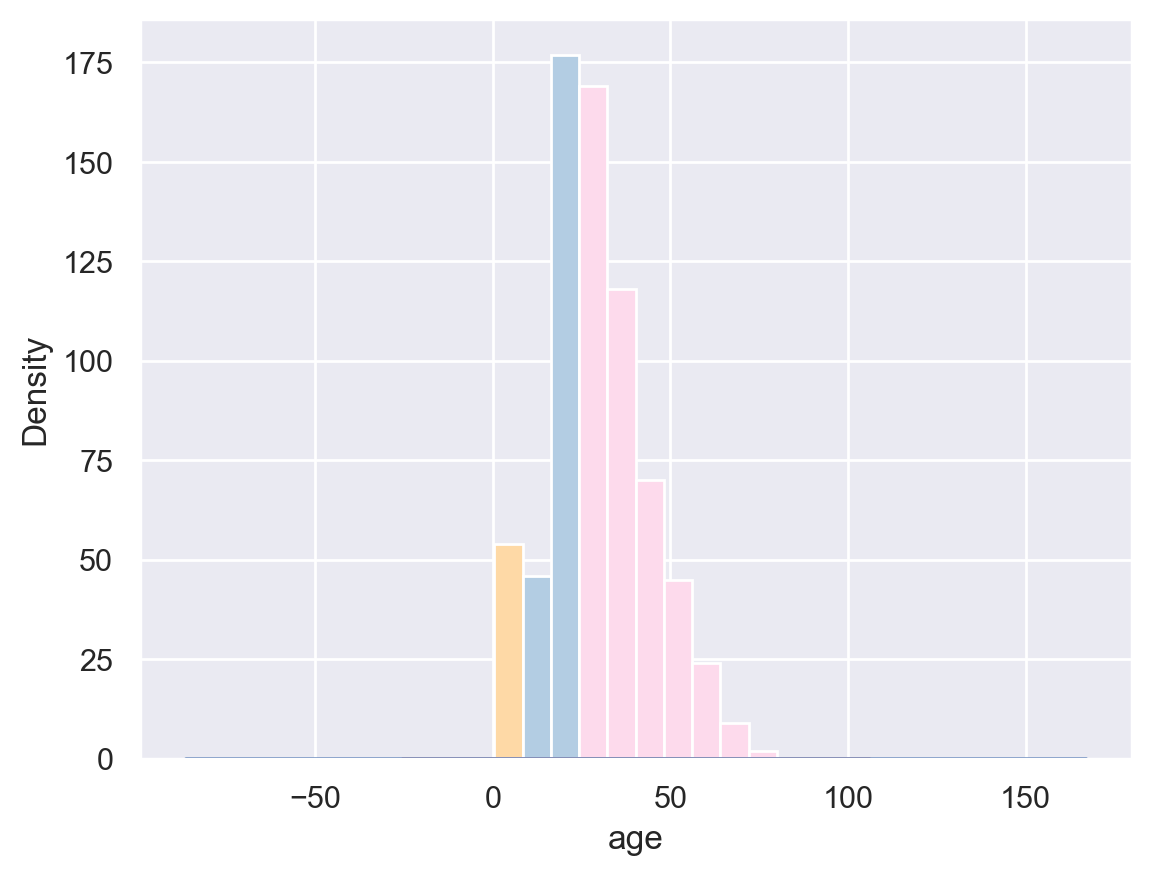

In [27]:
sns.kdeplot(titanic.age, bw=0.6, label="bw: 0.6", shade=True, color="r")
sns.kdeplot(titanic.age, bw=2,   label="bw: 2",   shade=True)
plt.show()

<div class='exercise'> <b> Exercise 4:</div>
    
- Plot the distribution of fare paid by passengers using [sns.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) .
- Store that plot to variable named `ax` .

In [35]:
"""Your code for exercise 4 here:"""
ax =sns.kdeplot(titanic.fare,  label="fare paid by passengers")

#### You can mix elements of `matplotlib` such as Axes with `seaborn` elements for a best use of both worlds.

In [38]:
import seaborn as sns
sns.set(color_codes=True)

# generate some random data to use
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)

fig, ax = plt.subplots(1,2, figsize=(15,5))

# seaborn goes in first subplot
sns.set(font_scale=0.5)
sns.distplot(x1, kde=False, bins=15, ax=ax[0])
sns.distplot(x2, kde=False, bins=15, ax=ax[0])
ax[0].set_title('seaborn Graph Here', fontsize=14)
ax[0].set_xlabel(r'$x$', fontsize=14)
ax[0].set_ylabel(r'$count$', fontsize=14)

# matplotlib goes in second subplot
ax[1].hist(x1, alpha=0.2, bins=15, label=r'$x1$')
ax[1].hist(x2, alpha=0.5, bins=15, label=r'$x2$')
ax[1].set_xlabel(r'$x$', fontsize=14)
ax[1].set_ylabel(r'$count$', fontsize=14)
ax[1].set_title('matplotlib Graph Here', fontsize=14)
ax[1].legend(loc='best', fontsize=14)

## 1.5 Boxplots

#### With `One` variable.

In [37]:
# seaborn
ax = sns.boxplot(x='age', data=titanic)
#ax = sns.boxplot(x=titanic['age']) # another way to write this
ax.set_ylabel(None)
ax.set_xlabel('age', fontsize=14)
ax.set_title('Distribution of age in the Titanic', fontsize=14)

Text(0.5, 1.0, 'Distribution of age in the Titanic')

#### With `Two` variables

<div class='exercise'> <b> Exercise 5:</div>
    
- Did more young people or older ones get first class tickets on the Titanic?
- Create a box plot and store it to variable called `ax` as above code.
- Create a box plot using two variables `class` and `age`

In [40]:
"""Your code for exercise 5 here:"""
ax = sns.boxplot(x='class', y='age', data=titanic)
ax.set_title('Age distr by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Age')

Text(36.75, 0.5, 'Age')

Note that many packages will provide these basic plotting functions. As you become more familiar with quickly performing exploratory data analysis, you will likely pick one that is your favorite. Every EDA software has tradeoffs, but the purpose of visualizing data is a shared value between them. Here's an example boxplot from pandas.

In [39]:
# two variable boxplot in pandas
titanic.boxplot('age',by='class')

<Axes: title={'center': 'age'}, xlabel='class'>

## 1.6 Scatterplots

#### Plotting the distribution of two variables

Also called a bivariate distribution where each observation is shown with  a point with x and y values. You can draw a scatterplot with the `matplotlib plt.scatter` function, or the `seaborn jointplot()` function:

In [42]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="fare", y="age", data=titanic, ax=ax)

<Axes: xlabel='fare', ylabel='age'>

In [43]:
sns.jointplot(x = "fare", y = "age", data=titanic, s=40, edgecolor="w", linewidth=1)

You may control the `seaborn` [Figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html).

In [41]:
# matplotlib
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(titanic['fare'], titanic['age'], alpha=0.8)
ax.set_xlabel('Fare', fontsize=15)
ax.set_ylabel('Age', fontsize=15)
ax.set_title('Fare vs. Age', fontsize=14)

Text(0.5, 1.0, 'Fare vs. Age')

#### Plotting the distribution of `three` variables

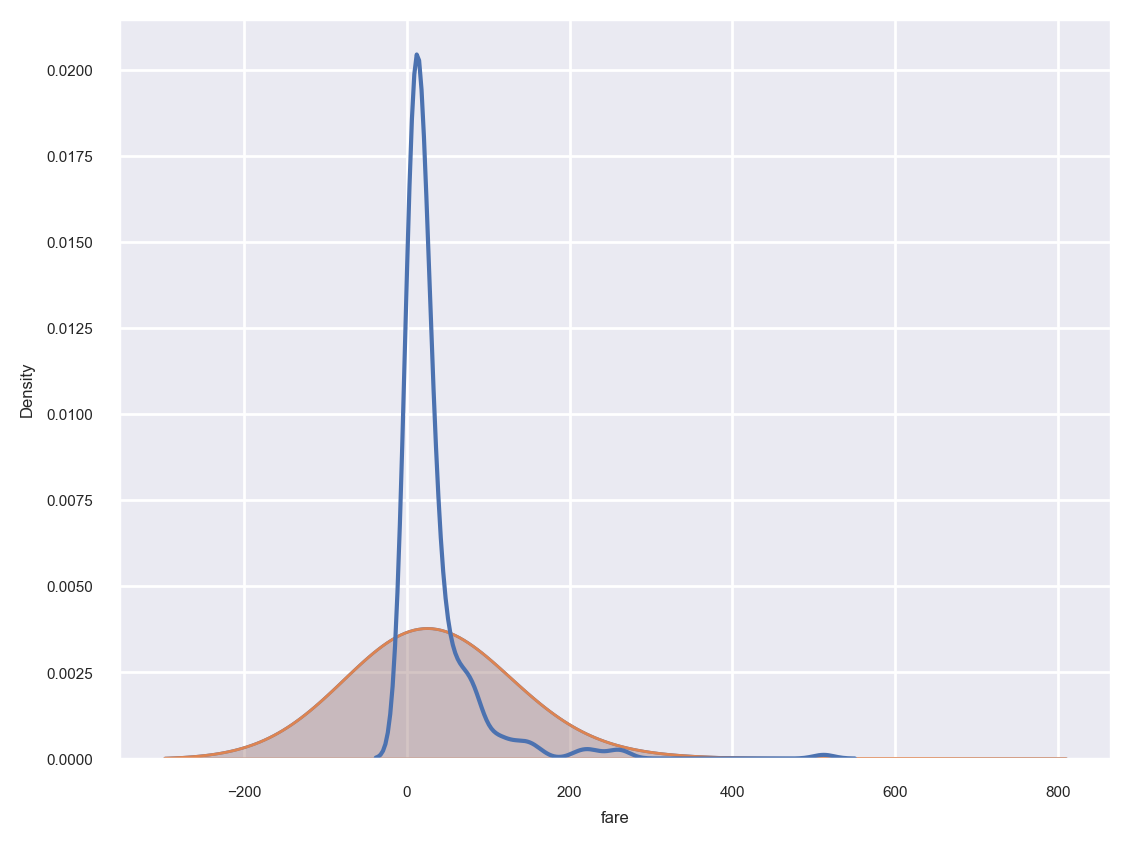

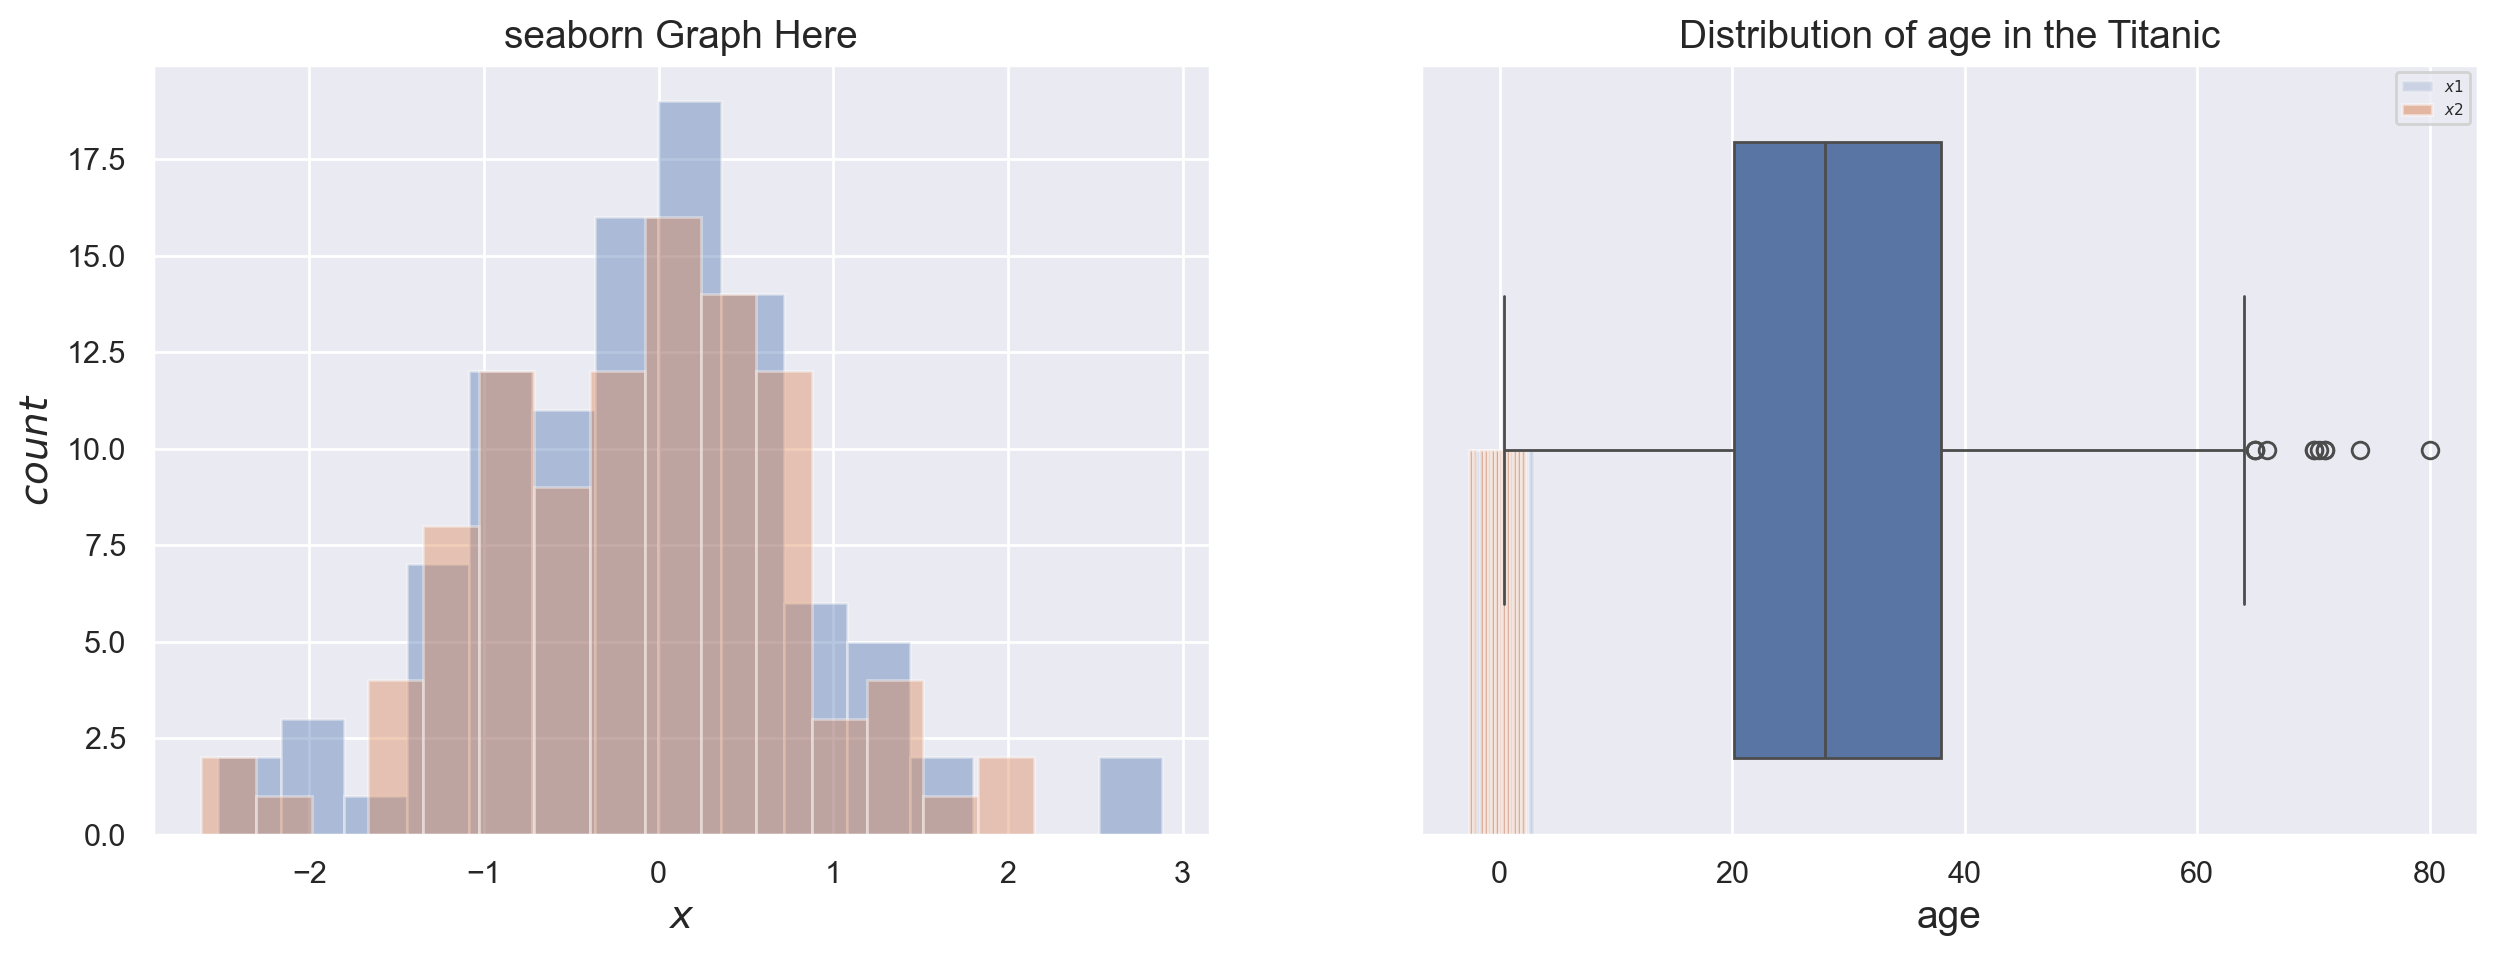

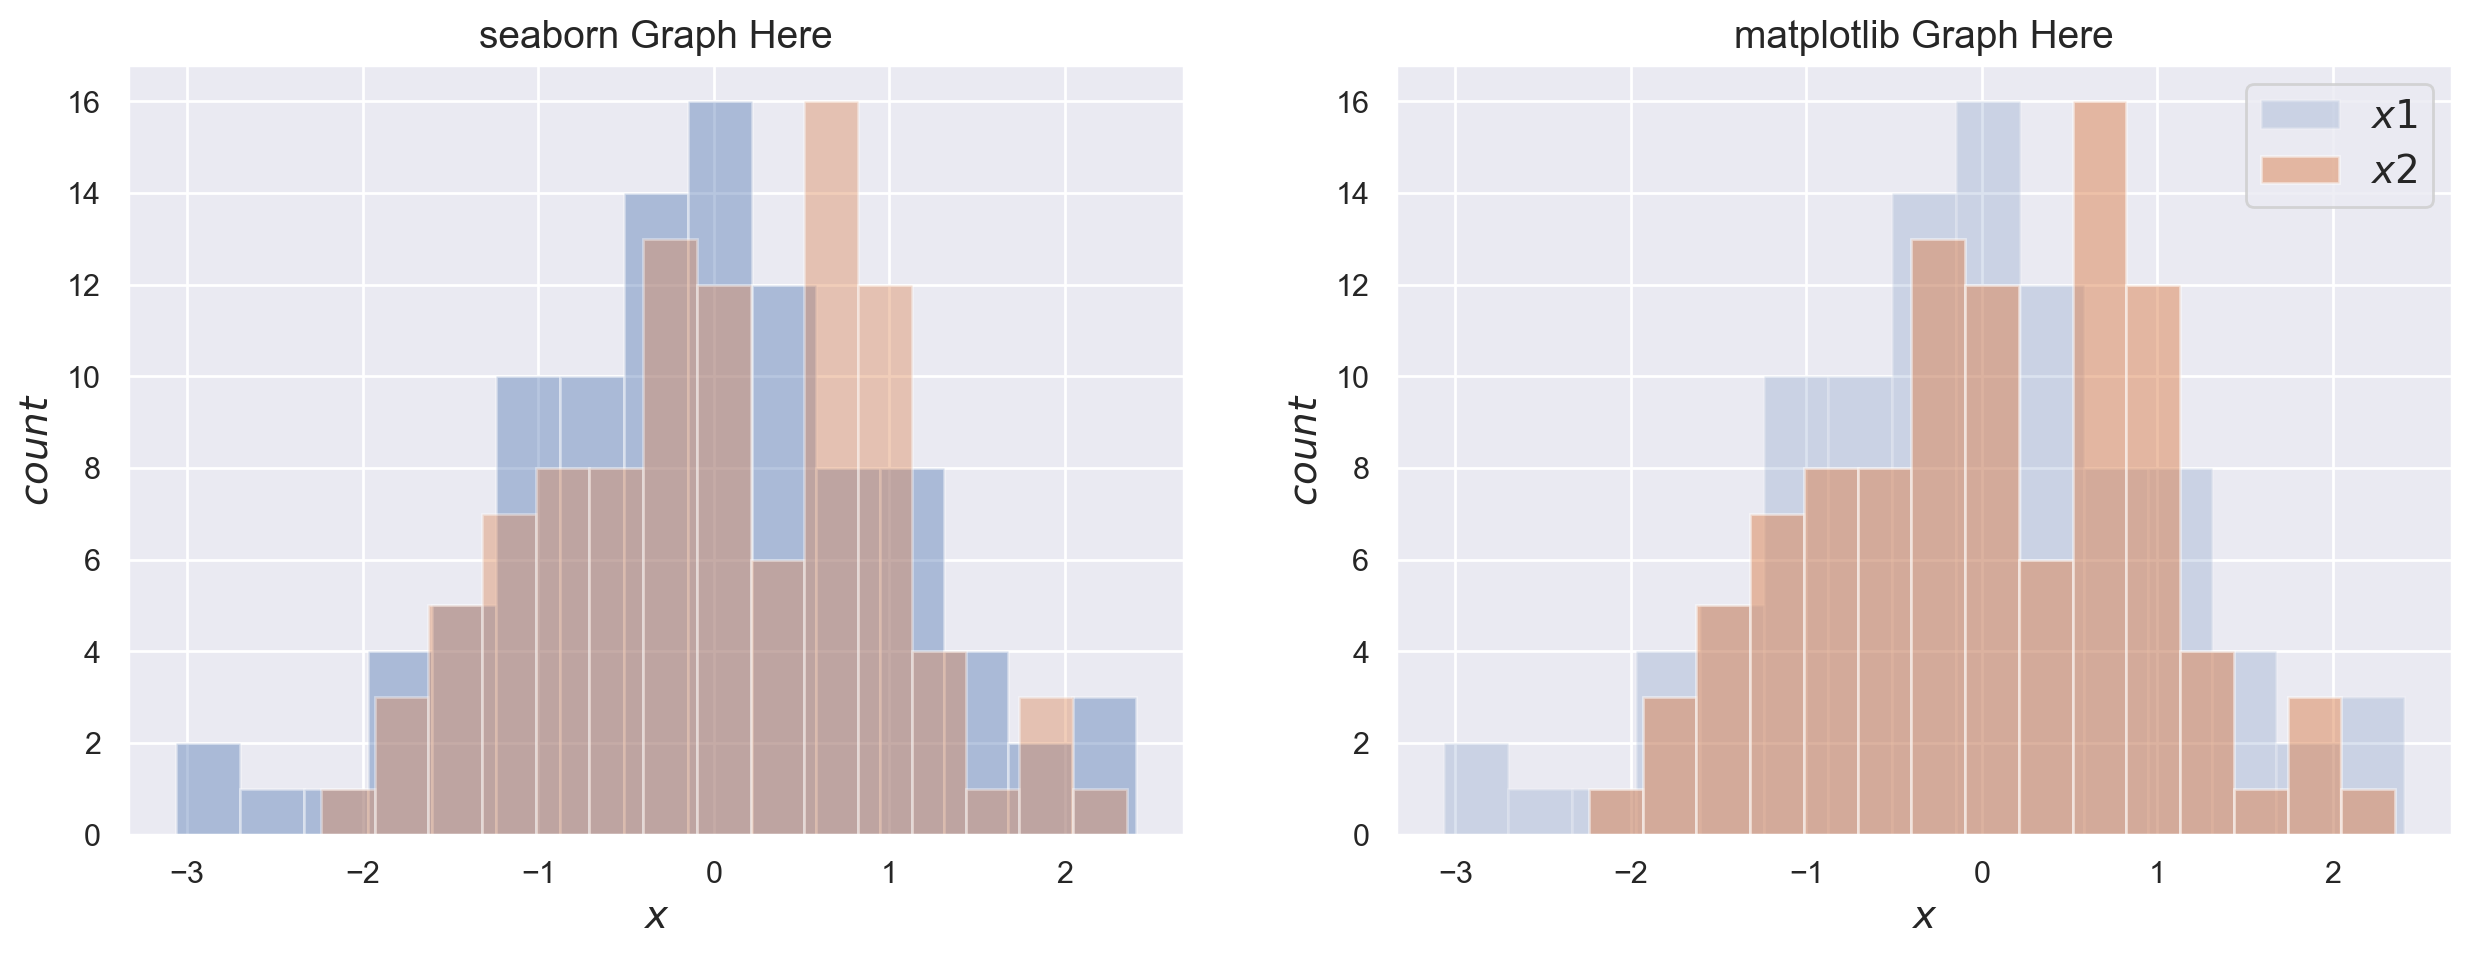

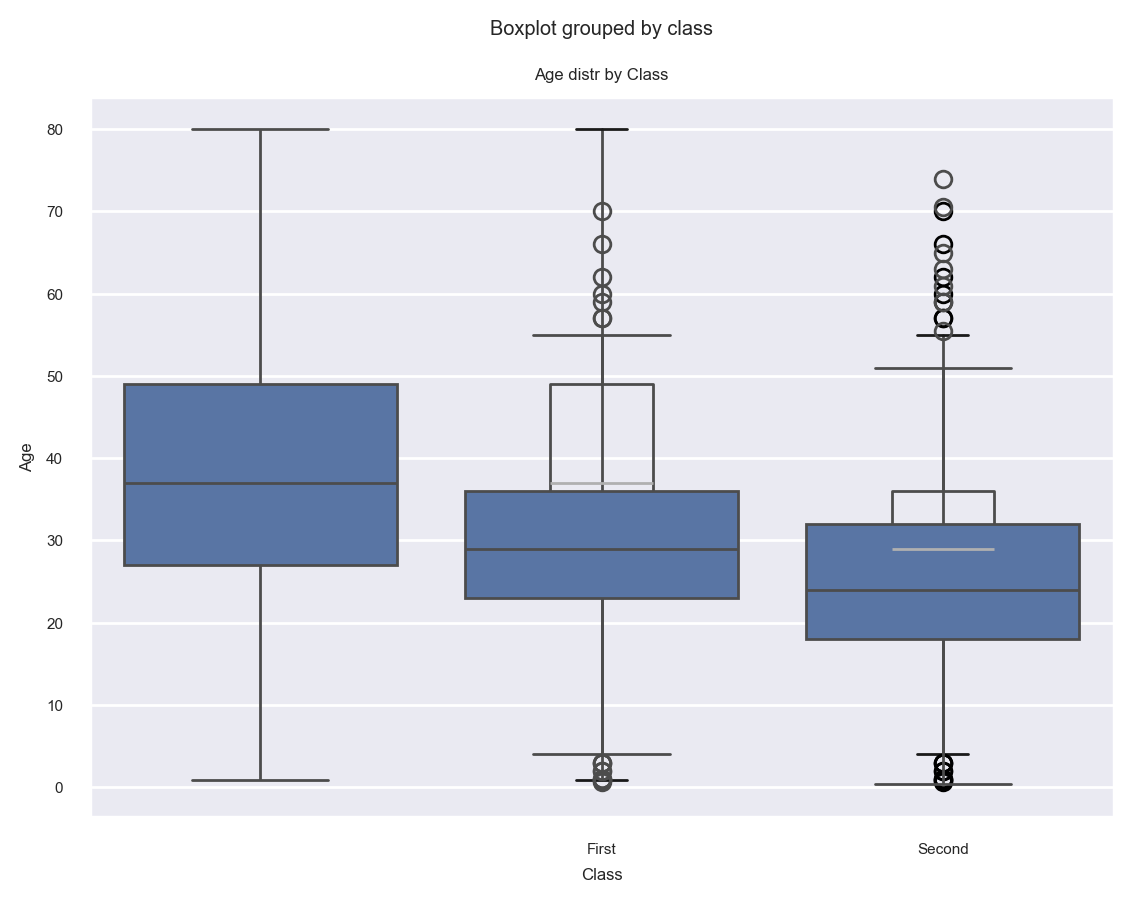

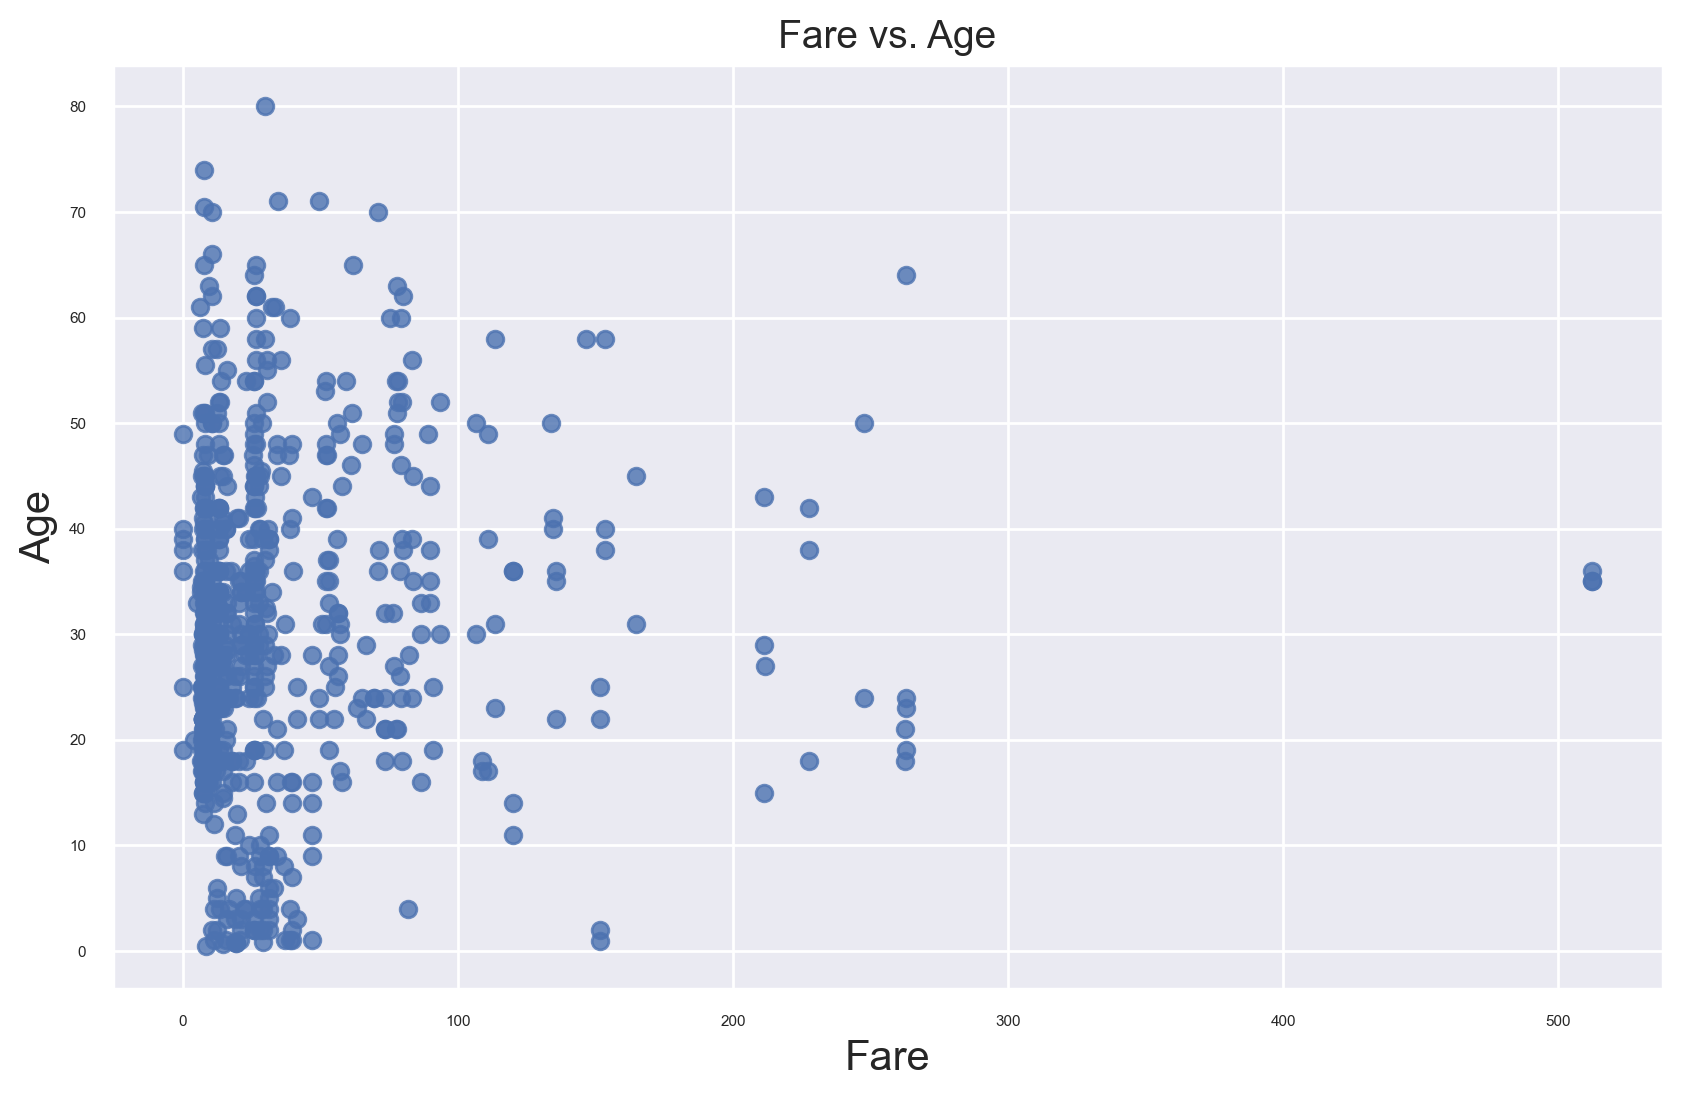

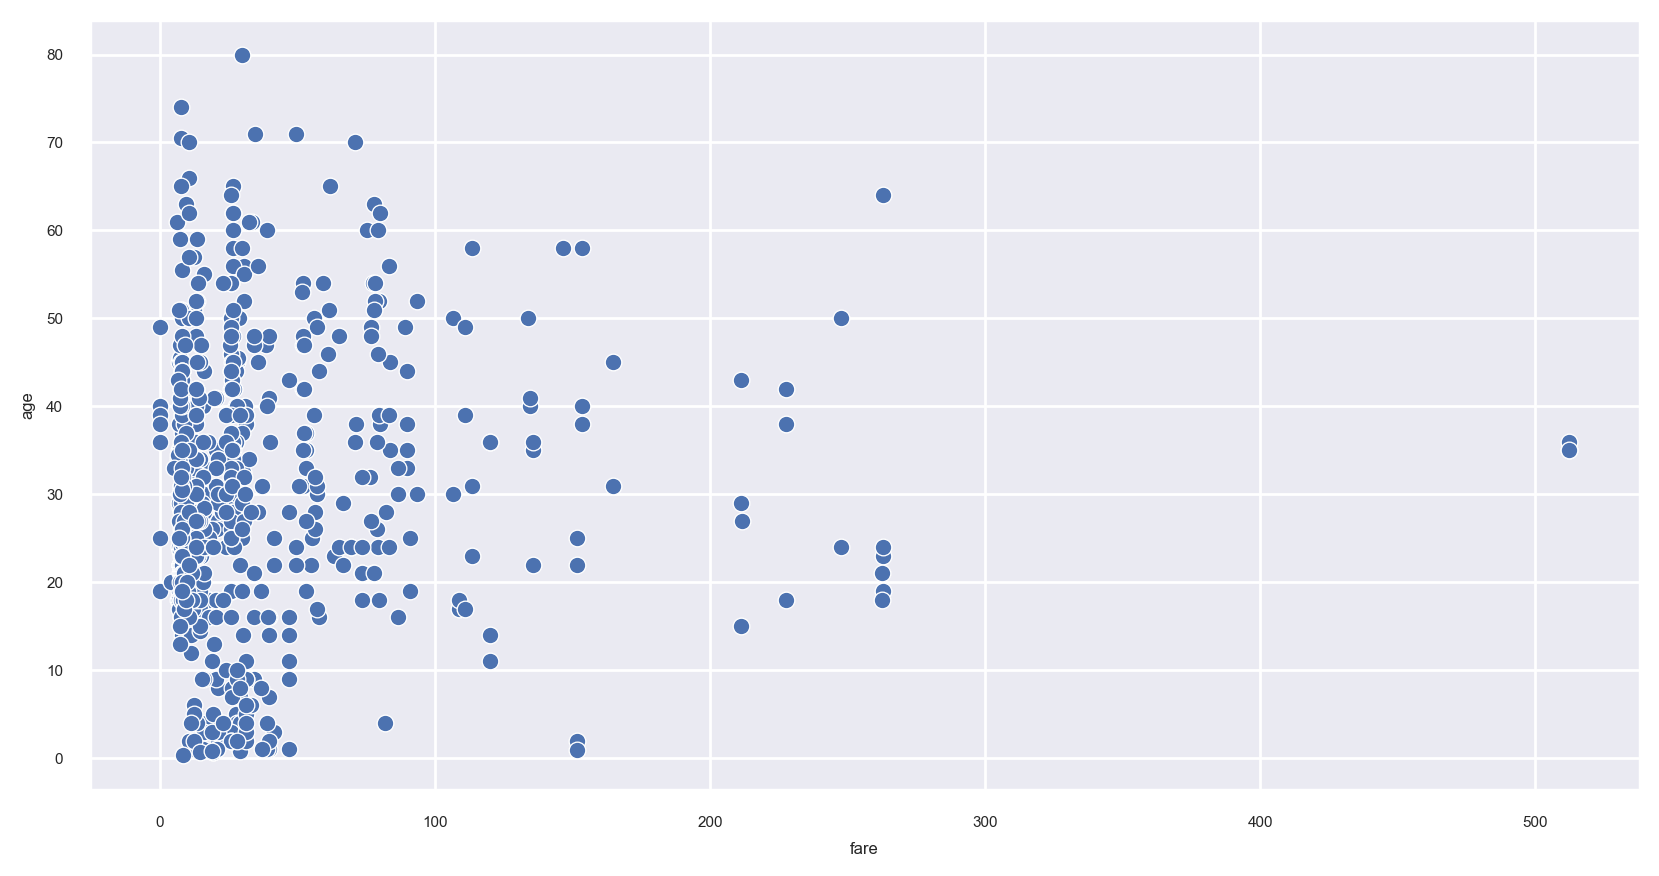

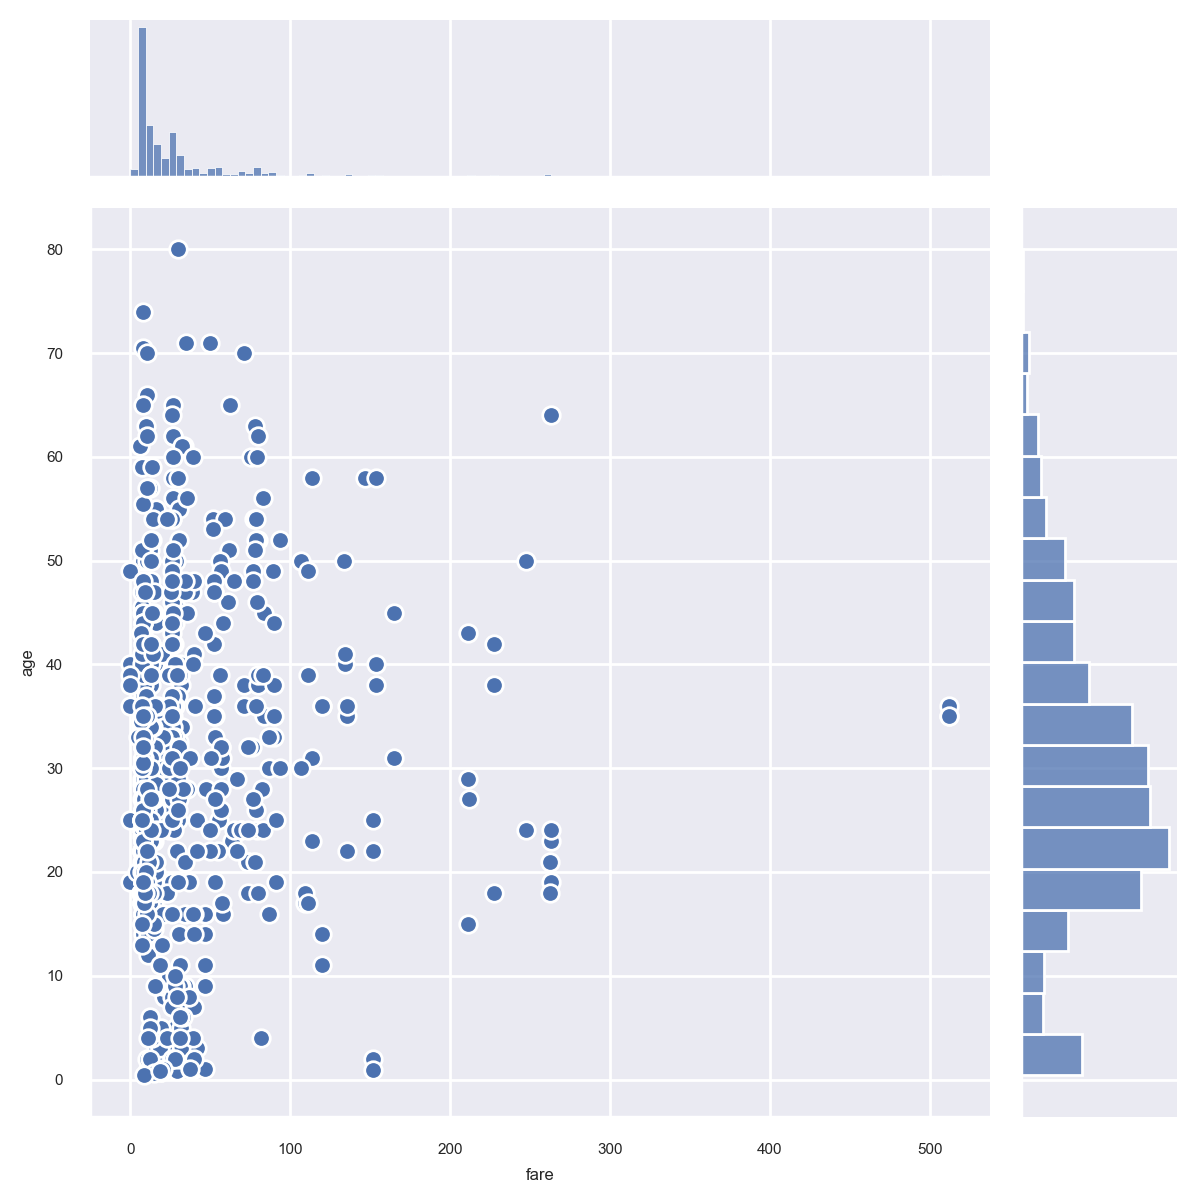

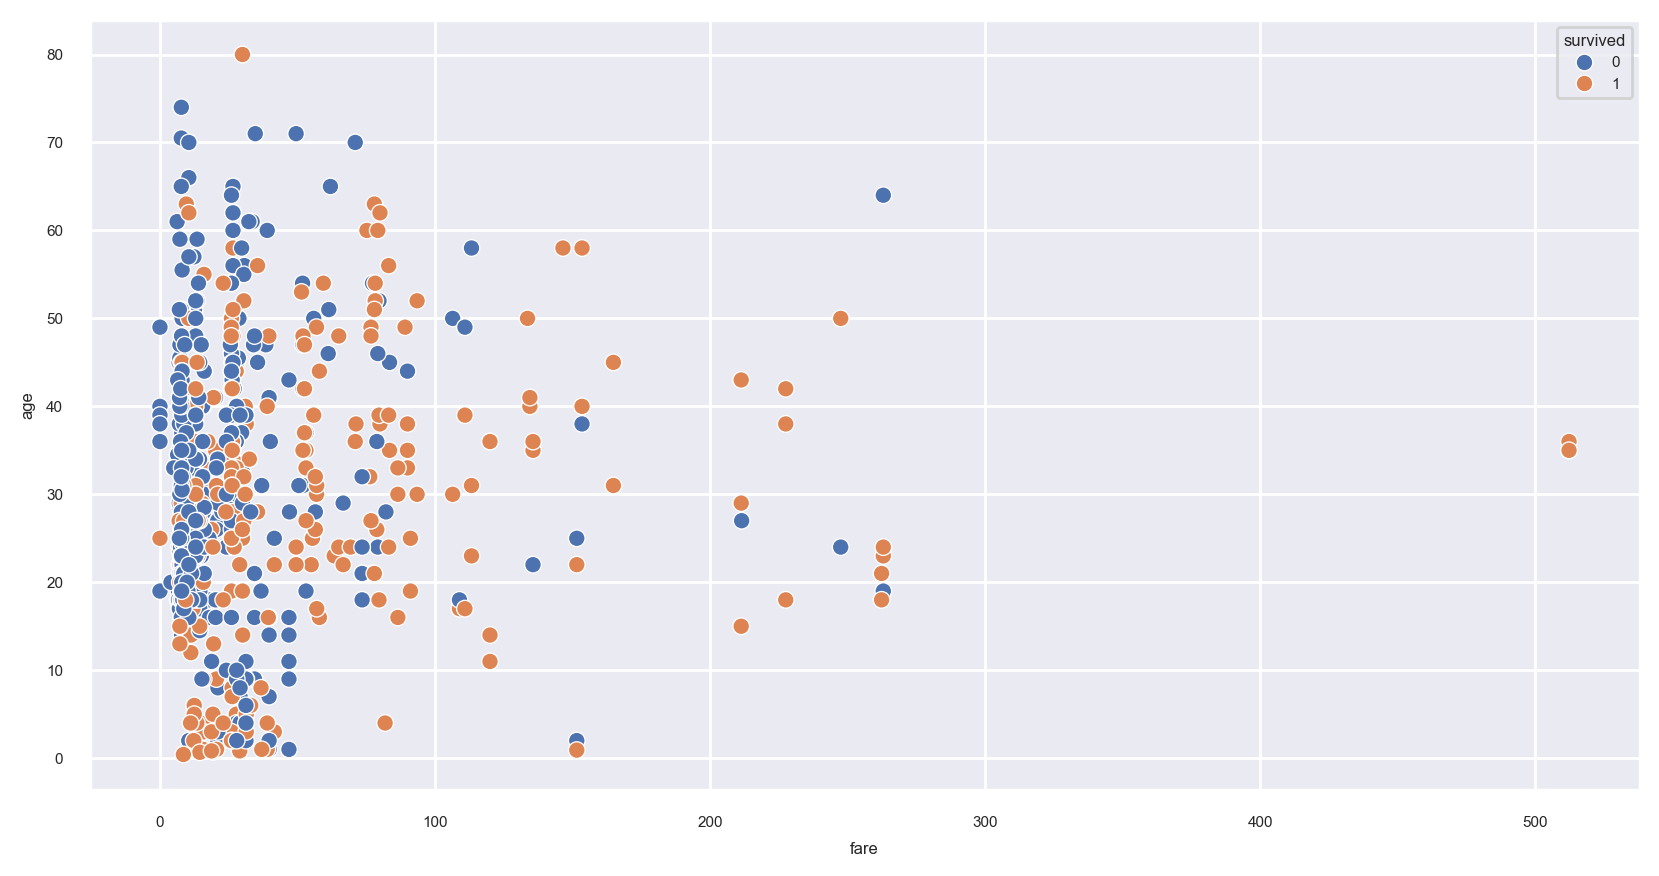

In [44]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="fare", y="age", hue="survived", data=titanic, ax=ax)
plt.show()

#### Plotting the distribution of `four` variables (going too far?)

<div class='exercise'> <b> Exercise 6: </div>

- Plot the distribution of fare paid by passengers according to age, survival and sex.
- Use `size=` for the fourth variable.

  1. To create the scatter plot, you need to set up the Figure and Axes objects using `plt.subplots()`. 
        - These two objects (fig and ax) will allow you to control various properties of the figure and plot.
        - `fig` is the Figure object: It serves as the overall container for the plot.
        - `ax` is the Axes object: This is where the actual data points will be plotted, including x and y axes, labels, etc.
        ```python
            Example code: fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        ```
  2. Customize the Plot: 
        - You need to set the title of the plot, the labels for the x-axis and y-axis, and format the ticks on the x-axis for better readability.

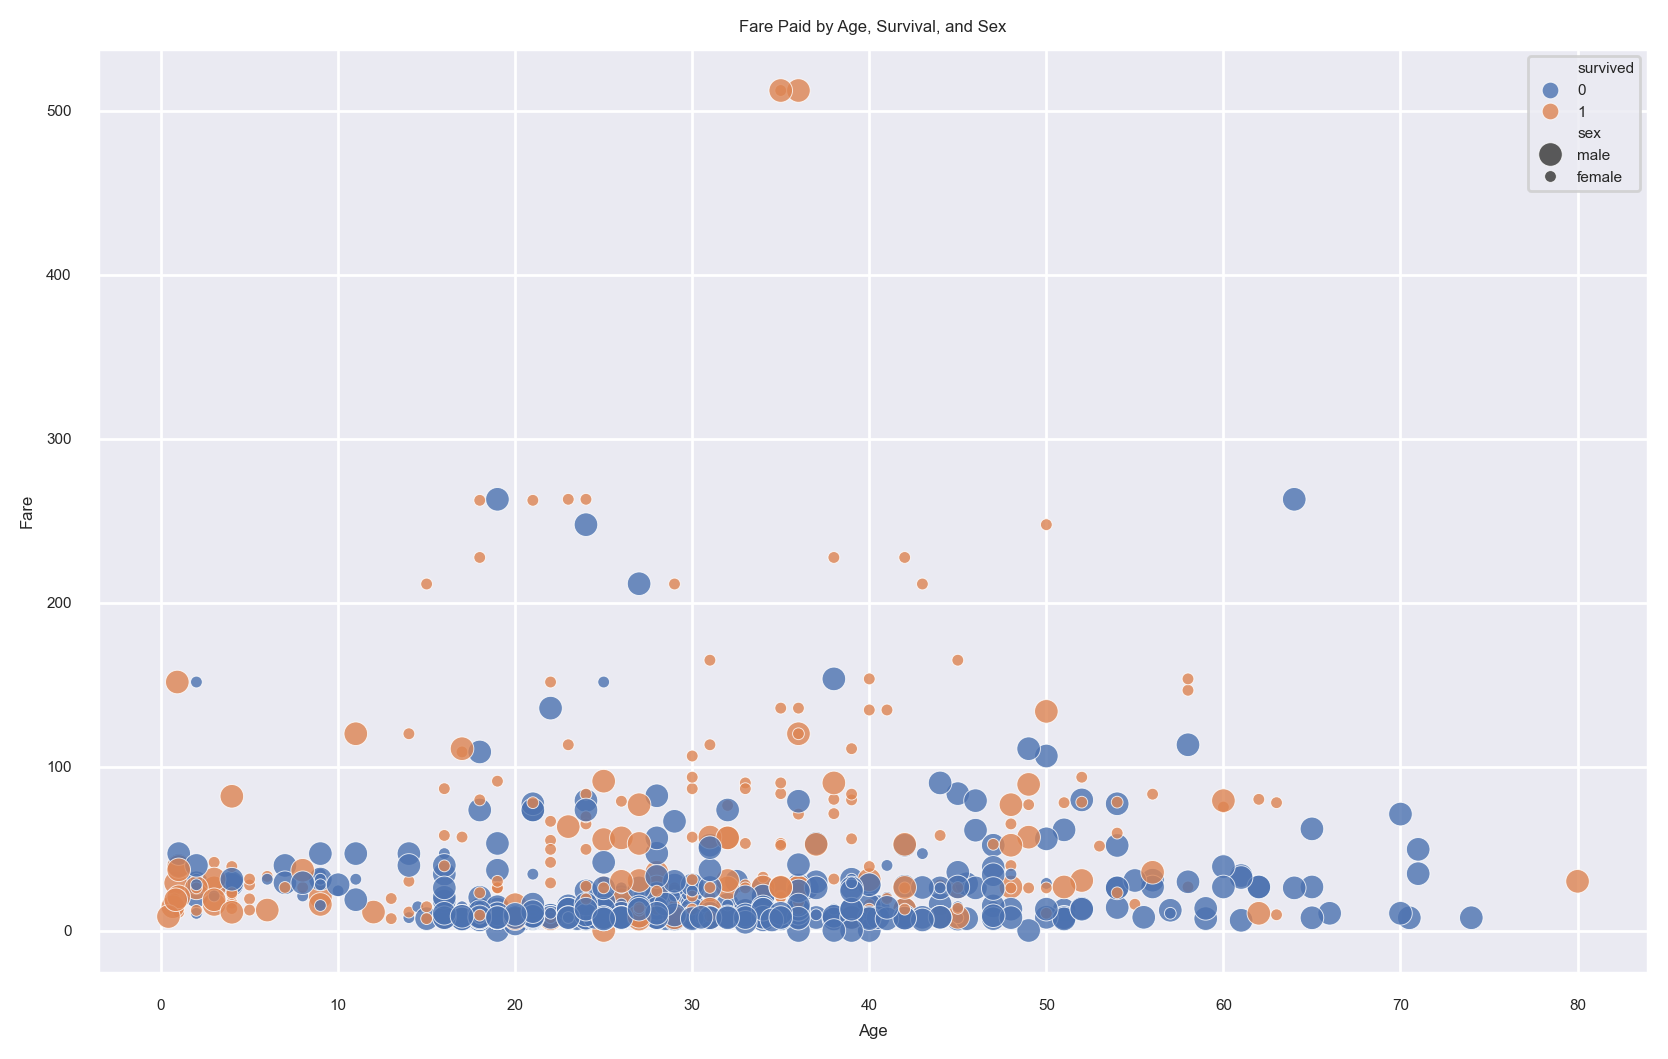

In [ ]:
"""Your code for exercise 6 here:"""
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(x="age", y="fare", hue="survived", size="sex", data=titanic, ax=ax, alpha=0.8)
ax.set_title("Fare by Age, Survival, and Sex")
ax.set_xlabel("Age")
ax.set_ylabel("Fare")
plt.show()

## 1.7 Pairplots

In [ ]:
titanic.columns

In [ ]:
to_plot = ['age', 'fare', 'survived', 'deck']

In [ ]:
df_to_plot = titanic.loc[:,to_plot]
sns.pairplot(df_to_plot)
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_to_plot, alpha=0.8, figsize=(10, 10), diagonal='kde')

## 1.8 Plotting Categorical Variables

In [ ]:
titanic = sns.load_dataset('titanic')
f, ax = plt.subplots(figsize=(7, 3))
ax = sns.countplot(y="deck", data=titanic, color="c")
ax.set_title('Titanic')

In [ ]:
ax = sns.countplot(x="class", data=titanic)
ax.set_title('Titanic')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) # Create figure object
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
ax = sns.countplot(x="deck", data=titanic)

In [ ]:
sns.set(style="ticks", palette="muted")
sns.relplot(x="age", y="deck", col="class", data=titanic);

For "small enough" data sets like the titanic, it can sometimes be helpful to generate a large number of correlation plots to quickly search for unexpected results. This technique does not scale well however, which motivates us for our journey into statistical learning later in this class!

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.pairplot(data=titanic, hue="deck")

# 2 - Introduction to `pandas` plotting.

There is plotting functionality built in `pandas`. Look for it in the `pandas` [documentation](https://pandas.pydata.org/docs/). It will only help you to be able to quickly search through and understand official documentation of common packages like pandas. Relying on search engine results, AI assistants, and whoever is sitting next to you at the time will not be as reliable or as fast as knowing how to read documentation.

**Example:** The `value_counts()` Series method and top-level function computes a histogram of a 1D array of values. It can
also be used as a function on regular arrays.

Reminder: DataFrame: “index” (axis=0, default), “columns” (axis=1) 

## 2.1 Line Graph

#### Good for time dependency or when a variable evolves

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A', 'B', 'C', 'D'])
df.head()

In [ ]:
# cumulative sum adds column values as it goes
df = df.cumsum()
df.head()

In [ ]:
plt.figure()
df.plot()
plt.legend(loc='best')

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()
plt.figure()
df.plot()

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

- `bar` or `barh` for bar plots
- `hist` for histogram
- `box` for boxplot
- `kde` or `density` for density plots
- `area` for area plots
- `scatter` for scatter plots
- `hexbin` for hexagonal bin plots
- `pie` for pie plots

In addition to these kind s, there are the `DataFrame.hist()`, and `DataFrame.boxplot()` methods, which use a separate interface. `scatter_matrix` in pandas.plotting takes a Series or DataFrame as an argument.

## 2.2 Bar Plots

In [ ]:
plt.figure()
df.iloc[0].plot(kind='bar')

In [ ]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.head()

In [ ]:
df2.plot.bar()
plt.show()

In [ ]:
# horizontal bar plot
df2.plot.barh(stacked=False)
plt.show()

## 2.3 Histograms

In [ ]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000), 
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

plt.figure()
df4.plot.hist(alpha=0.5, stacked=False, bins=60)

## 2.4 Boxplots

In [ ]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
        'medians': 'DarkBlue', 'caps': 'Gray'}

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box(color=color )

## 2.5 Area plots

You can create area plots with `Series.plot.area()` and `DataFrame.plot.area()`. Area plots are stacked
by default. To produce stacked area plot, each column must be either all positive or all negative values.

In [ ]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area(stacked=True)

In [ ]:
df.plot.area(stacked=False)

## 2.6 Scatterplot

Scatter plot can be drawn by using the DataFrame.plot.scatter() method. Scatter plot requires numeric
columns for the x and y axes. These can be specified by the x and y keywords.

In [ ]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

### `pandas` Tricks

The copy() method on pandas objects copies the underlying data (though not the axis indexes, since they are immutable)
and returns a new object. Note that it is seldom necessary to copy objects. For example, there are only a
handful of ways to alter a DataFrame in-place:

- Inserting, deleting, or modifying a column.
- Assigning to the index or columns attributes.
- For homogeneous data, directly modifying the values via the values attribute or advanced indexing.

To be clear, no pandas method has the side effect of modifying your data; almost every method returns a new object,
leaving the original object untouched. If the data is modified, it is because you did so explicitly

<a class="anchor" id="#exercise"></a>
# 3 - Exercise: 1/2 hour in the Life of a Cardiologist 
 
Try each exercise on your own and then discuss with your peers. Feel free to engage the TA's and instructors as well. 

Visualize and explore the data. Use `.describe()` to look at your data and also examine if you have any missing values. <BR> 
What is the actual number of feature variables after converting categorical variables to dummy ones?<BR><BR>
**List of available variables (includes target variable `num`):**

- **age**: continuous
- **sex**: categorical, 2 values {0: female, 1: male}
- **cp** (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
- **restbp** (resting blood pressure on admission to hospital): continuous (mmHg)
- **chol (serum cholesterol level)**: continuous (mg/dl)
- **fbs** (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
- **restecg** (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
- **thalach** (maximum heart rate achieved): continuous
- **exang** (exercise induced angina): categorical, 2 values {0: no, 1: yes}
- **oldpeak** (ST depression induced by exercise relative to rest): continuous
- **slope** (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
- **ca** (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
- **thal**: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
- **num** (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}

In [ ]:
columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [ ]:
# load the dataset
heart_df = pd.read_csv('data/heart_disease.csv', header=None, names=columns)
heart_df.head()

**Pandas trick: `.replace`** The response variable (num) is categorical with 5 values, but we don't have enough data to predict all the categories. <BR> Therefore we'll replace `num` with `hd` (heart disease): **categorical, 2 values {0: no, 1: yes}**. <BR>
Use the code below (take a minute to understand how it works, it's very useful!):

In [ ]:
# Replace response variable values with a binary response (1: heart disease(hd) or 0: not)
heart_df['num'].replace(to_replace=[1,2,3,4],value=1,inplace=True)

# Rename column for clarity
heart_df = heart_df.rename(columns = {'num':'hd'})
heart_df.head()

In [ ]:
# look at the features
heart_df.info()

In [ ]:
heart_df.describe()

At this point you should split in train and test set and work only on the **train!!**. For simplicity we will not do this in this exercise.

### Answer the following question using plots

01. At what ages do people seek cardiological exams? 
02. Do men seek help more than women? 
03. Examine the variables. How do they relate to one another?
04. (Variation on 02): What % of men and women seek cardio exams? 
05. Does resting blood pressure increase with age?

<div class='exercise'> <b> Question 1: At what ages do people seek cardiological exams?</div>



**Hint:** Create a histogram plot with kde = True in order to visualize this.
    
  1. To create this plot, you need to set up the Figure and Axes objects using `plt.subplots()`. 
        - These two objects (fig and ax) will allow you to control various properties of the figure and plot.
        - `fig` is the Figure object: It serves as the overall container for the plot.
        - `ax` is the Axes object: This is where the actual data points will be plotted, including x and y axes, labels, etc.
        ```python
            Example code: fig, ax = plt.subplots(figsize=(10, 6))
        ```
  2. Customize the Plot: 
        - You need to set the title of the plot, the labels for the x-axis and y-axis, and format the ticks on the x-axis for better readability.

In [ ]:
"""Your code for Question 1 here:"""

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(heart_df['age'], kde=True, bins=20, ax=ax)
ax.set_title('Distr of Age for Seeking Cardiological Exams')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Patients')
# ax.tick_params(axis='x', rotation=0)
plt.show()

`Question 1:` **What is the most frequent age people seek cardiological exams?** Store your integer answer to a variable called `answer` in the below cell.

In [ ]:
# your code here
answer = 59

In [ ]:
### BEIGN HIDDEN TESTS
assert 58 <= answer <= 60, 'Which bar is the tallest on histogram.'

<div class='exercise'> <b> Question 2: Do men seek help more than women?</div>



**Hint:** Create a count plot in order to visualize this.
    
  1. To create this plot, you need to set up the Figure and Axes objects using `plt.subplots()`. 
        - These two objects (fig and ax) will allow you to control various properties of the figure and plot.
        - `fig` is the Figure object: It serves as the overall container for the plot.
        - `ax` is the Axes object: This is where the actual data points will be plotted, including x and y axes, labels, etc.
        ```python
            Example code: fig, ax = plt.subplots(figsize=(10, 6))
        ```
  2. Customize the Plot: 
        - You need to set the title of the plot, the labels for the x-axis and y-axis, and format the ticks on the x-axis for better readability.

In [ ]:
"""Your code for Question 2 here:"""
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='sex', data=heart_df, ax=ax)
ax.set_title('Count of Exams by Sex')
ax.set_xlabel('Sex: (0 = Female, 1 = Male)')
ax.set_ylabel('Number of Patients')
ax.tick_params(axis='x', rotation=0)
plt.show()

**Do men seek help more than women?** Assign a boolean value to a variable named `answer` in the next cell to check! 

In [ ]:
# your code here
answer=1

In [ ]:
heart_df.replace({'sex': {'F': 0., 'M': 1.}}, inplace=True)

The number of feature variables (after converting categorical variables to dummy ones) is: 
1 (age) + 1 (sex) + 3 (cp) + 1 (restbp) + 1 (chol) + 1 (fbs) + 2 (restecg) + 
1 (thalach) + 1 (exang) + 1 (oldpeak) + 2 (slope) + 1 (ca) + 2 (thal) = 18

<div class='exercise'> <b> Question 3: Examine the variables. How do they relate to one another?</div>



**Hint:** Create a [sns.pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for numerical data in order to visualize this.
- Print and save correlation matrix to variable named `corr_matrix`. 
- Refer to this [document](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) about correlation matrix.
    
  1. To create this plot, you need to set up the Figure and Axes objects using `plt.subplots()`. 
        - These two objects (fig and ax) will allow you to control various properties of the figure and plot.
        - `fig` is the Figure object: It serves as the overall container for the plot.
        - `ax` is the Axes object: This is where the actual data points will be plotted, including x and y axes, labels, etc.
        ```python
            Example code: fig, ax = plt.subplots(figsize=(10, 6))
        ```
  2. Customize the Plot: 
        - You need to set the title of the plot, the labels for the x-axis and y-axis, and format the ticks on the x-axis for better readability.

In [ ]:
# Defining numerical and categorical variables
categorical = ["sex", "cp", "fbs", "restecg", "exang",  "slope", "ca", "thal", "hd"]
numerical = ["age","restbp", "chol", "thalach",  "oldpeak"]

In [ ]:
"""Your code for Question 3 here:"""
sns.pairplot(heart_df[numerical])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)

corr_matrix = heart_df[numerical].corr()
print(corr_matrix)

fig, ax = plt.subplots(3, 3, figsize=(10, 6))
ax = ax.flatten()

for i, var in enumerate(categorical):
    sns.countplot(x=var, data=heart_df, ax=ax[i])
    ax[i].set_title(f"Countplot of {var}")
    ax[i].set_xlabel(var)
    ax[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

`Practice exercise`  **Examine the variables by plotting graphs. How do they relate to one another?** use the below cell to write some code.

In [ ]:
"""Practice space"""

<div class='exercise'> <b> Question 4: What percentage of men and women seek cardio exams? </div>
    
- Calculate the percentage of men and women seeking cardiological exams
- Store percentage of men and women seeking cardio exams to `percentage_men` and `percentage_women` respectively.

In [ ]:
"""Your code for Question 4 here:"""
total = len(heart_df)
men = len(heart_df[heart_df['sex'] == 1])
women = len(heart_df[heart_df['sex'] == 0])

percentage_men = round((men / total) * 100)
percentage_women = round((women / total) * 100)
print("Men:", percentage_men, "%")
print("Women:", percentage_women, "%")

`Question 4:` **What percentage of men and women seek cardio exams?** Store your integer answer to a variable called `answer` in the below cell.

In [ ]:
# your code here
answer = percentage_men

In [ ]:
### BEIGN HIDDEN TESTS
assert 67 <= answer <= 70, 'Incorrect value !'

<div class='exercise'> <b> Question 5: Does resting blood pressure increase with age? </div>
    
**Hint:** Create a box plot in order to visualize this.
    
  1. To create this plot, you need to set up the Figure and Axes objects using `plt.subplots()`. 
        - These two objects (fig and ax) will allow you to control various properties of the figure and plot.
        - `fig` is the Figure object: It serves as the overall container for the plot.
        - `ax` is the Axes object: This is where the actual data points will be plotted, including x and y axes, labels, etc.
        ```python
            Example code: fig, ax = plt.subplots(figsize=(10, 6))
        ```
  2. Customize the Plot: 
        - You need to set the title of the plot, the labels for the x-axis and y-axis, and format the ticks on the x-axis for better readability.

In [ ]:
"""Your code for Question 5 here:"""
heart_df['age_group'] = pd.cut(heart_df['age'], bins=[25, 35, 45, 55, 70], labels=['25-35', '36-45', '46-55', '56-70'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='age_group', y='restbp', data=heart_df, ax=ax)
ax.set_title('Resting Blood Pressure by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Resting Blood Pressure (mmHg)')
plt.show()

Write your answer for `Question 5:` **Does resting blood pressure increase with age?** Put a boolean value in a variable called `answer` in the cell below.

In [ ]:
answer = True

# 4- Bonus: Find the hidden pattern

Read the following file into a `pandas` Dataframe: '../data/mystery.csv' and plot it.  How does it look? You should see a beautiful pattern. If not, think of ways to fix the issue.

In [ ]:
mystery = pd.read_csv('data/mystery.csv',  sep=' ', header=None) 
mystery.head()

In [ ]:
"""Your Code here for the bonus exercise:"""

# your code here
raise NotImplementedError

# End